In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
x = iris.data
y = iris.target
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,stratify = y, test_size=0.3)
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1, 2]), array([35, 35, 35])),
 (array([0, 1, 2]), array([15, 15, 15])))

In [15]:
class LogisticRegressionGD(object):
  ''' 경사하강법을 사용한 로지스특 회귀
  parameter : 
    eta : float (0.0~1.0)  학습률
    n_iter : int  반복훈련 횟수
    random_sate : int 랜덤시드값
    w_ : 가중치(학습)
    cost_ : list  에포크마다 누적된 비용함수의 제곱합
  '''
  def __init__(self,eta=0.01, n_iter=50, random_state = 1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, x,y):
    ''' 훈련함수
      x : array, shape = (samples, features )
      y : array, shape = (samples )      
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ =  rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x);
      output = self.activation(net_input);
      errors = (y - output)
      # x 행렬, erros 벡터
      # 행렬-벡터 곱셈  x.T.dot(erros)
      self.w_[1:] += self.eta*x.T.dot(errors)
      self.w_[0] += self.eta*errors.sum()
      
      # 오차 제곱합 대신 로지스틱 비용을 계산
      cost = -y.dot(np.log(output)) - (1-y).dot(np.log(1-output))
      self.cost_.append(cost)
    return self

  def net_input(self, x):
    '''최종입력 함수'''
    return np.dot(x, self.w_[1:]) + self.w_[0]
  def activation(self, z):
    '''로지스틱 시그모이드 활성화 계산  '''
    return 1. / (1. + np.exp(-np.clip(z, -250,250)))    
  def predict(self, x):
    ''' 단위 계단함수를 사용해서 클래스 레이블을 반환'''
    return np.where(self.activation(self.net_input(x)) >=0.5, 1, 0  )
  


이진분류이기 때문에 0과 1에 해당하는 레이블에 대한 데이터만 추출한다.

In [29]:
y_train_subset =  y_train[y_train != 2]
x_train_subset = x_train[y_train != 2]

In [47]:
lr = LogisticRegressionGD(eta=0.05,n_iter=1000, random_state=1)
lr.fit(x_train_subset, y_train_subset)

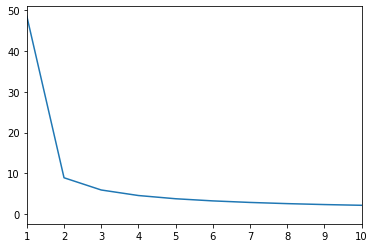

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(lr.cost_)+1), lr.cost_)
plt.xlim(1,10)
plt.show()

In [49]:
# 도전문제.... 클래스로만든 로지스틱회귀의 정화률(accuracy를 계산)
# 학습하지 않은 테스트 데이터로 실시

# 사이킷런 로지스틱회귀를 이용해서 확인
# 직접만든 아딜린기반의 로지스틱회 회귀에 비해서 사이킷런이 제공하는 로지스틱회귀는 다중분류도 지원

In [45]:
# x_train, y_train
# 사이킷 런의 로지스틱 회귀 모델을 로드
# 훈련
# 평가(정확성) 또는 예측(predict)
# 정확성.... 모델.score  / 사이킷런 accuracy_score

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.9714285714285714, 0.9777777777777777)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,random_state=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.9809523809523809, 1.0)

In [65]:
# 훈련셈플이 클래스에 속할 확률
np.argmax(lr.predict_proba(x_test[:5]),axis=1), y_test[:5]

(array([2, 0, 0, 2, 1]), array([2, 0, 0, 2, 1]))

In [66]:
lr.predict( x_test[:5] )

array([2, 0, 0, 2, 1])

데이터 처리

In [70]:
df = pd.DataFrame([[1.0, 2.0,3.0,4.0], [5.0,6.0,np.nan,8.0], [10.0,11.0,12.0,np.nan]],
                   columns=['A', 'B','C','D'])
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [72]:
# 결측치 확인  isnull  sum
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [78]:
df[df.isnull().any(axis=1)]

,A,B,C,D
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [82]:
# 결측치 제거  dropna  축방향에 따라서 제거
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [83]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [86]:
df['C'].mean()

7.5

In [87]:
df['C'].fillna(7.5)

0     3.0
1     7.5
2    12.0
Name: C, dtype: float64

In [89]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [92]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


순서가 있는 데이터 매핑

In [93]:
# M : 1 L : 2 LX : 3
df['size'] = df['size'].map({
    'M':1,'L':2,'XL':3
})
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [101]:
mapdata = {value:idx  for idx, value in enumerate(np.unique(df['classlabel']))}
mapdata

{'class1': 0, 'class2': 1}

In [103]:
df['classlabel'] = df['classlabel'].map(mapdata)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1
